### Credit Card Fraud Detection

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
train_data=pd.read_csv("C:\\Users\\PAVITHRA J\\Download\\fraudTrain.csv")

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
missing_values = train_data.isnull().sum()
print(missing_values)

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


### Correlation matrix

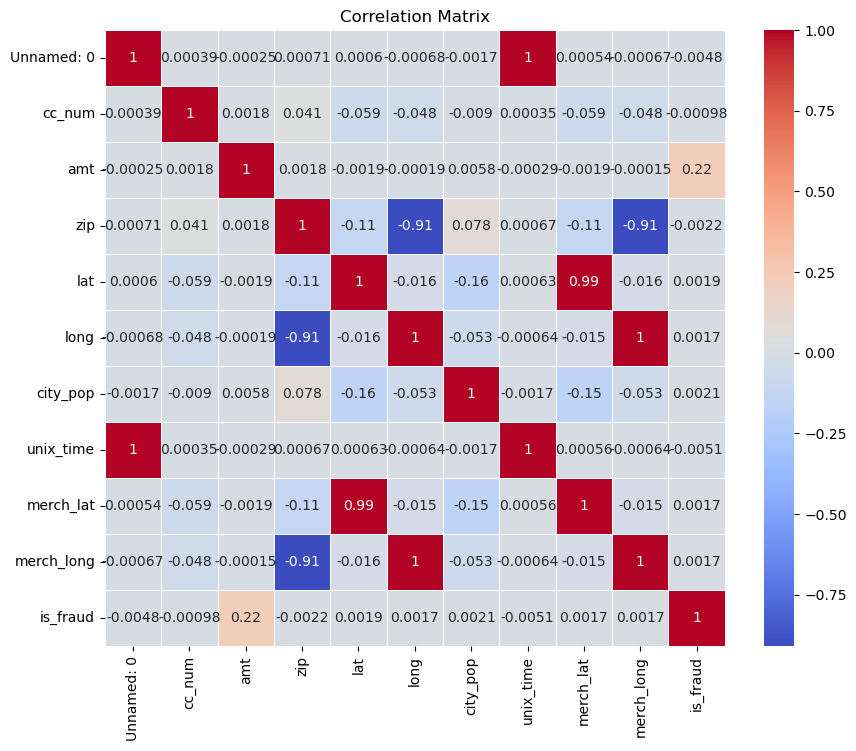

In [5]:

correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
x_train = train_data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']]
y_train = train_data['is_fraud']


In [9]:
test_data=pd.read_csv("C:\\Users\\vikra\\Downloads\\archive (17)\\fraudTest.csv")

In [10]:
x_test=test_data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']]
y_test = test_data['is_fraud']


### Model Training

In [26]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

### Model Evaluation

### Logistic Regression

In [28]:
logistic_predictions = logistic_model.predict(x_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_classification_report = classification_report(y_test, logistic_predictions)
logistic_roc_auc = roc_auc_score(y_test, logistic_predictions)

### Decision Tree

In [29]:
decision_tree_predictions = logistic_model.predict(x_test)
decision_tree_accuracy = accuracy_score(y_test, logistic_predictions)
decision_tree_classification_report = classification_report(y_test, logistic_predictions)
decision_tree_roc_auc = roc_auc_score(y_test, logistic_predictions)

In [35]:
print(decision_tree_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [37]:
print(decision_tree_roc_auc)

0.49968567887942716


In [30]:
random_forest_predictions = logistic_model.predict(x_test)
random_forest_accuracy = accuracy_score(y_test, logistic_predictions)
random_forest_classification_report = classification_report(y_test, logistic_predictions)
random_forest_roc_auc = roc_auc_score(y_test, logistic_predictions)

### Hyper Parameter Tunning

In [34]:
param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_decision_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_decision_tree, cv=5)
grid_search_decision_tree.fit(x_train, y_train)

# Get the best hyperparameters
best_params_decision_tree = grid_search_decision_tree.best_params_
best_decision_tree_model = grid_search_decision_tree.best_estimator_

KeyboardInterrupt: 

In [ ]:
param_grid_random_forest = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_random_forest = GridSearchCV(RandomForestClassifier(), param_grid_random_forest, cv=5)
grid_search_random_forest.fit(x_train, y_train)

# Get the best hyperparameters
best_params_random_forest = grid_search_random_forest.best_params_
best_random_forest_model = grid_search_random_forest.best_estimator_
